In [14]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  2017nat_housing_survey1.csv

Source: American Housing Survey by US Census Bureau

https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/2017-ahs-metropolitan-puf-microdata.html


In [15]:
# File to Load 
file_to_load = "../dataset/2017nat_housing_survey1.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
1,11000002,1970,8.0,1.0,7,2.0,7.0,10.0,10.0,1,4,3,3,1005540.0,99998
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980
5,11000008,1919,3.0,NaN,5,NaN,NaN,7.0,7.0,2,1,1,9,NaN,99998
6,11000009,1970,5.0,NaN,6,NaN,2.0,NaN,NaN,1,3,3,2,877854.0,99998
7,11000010,1970,3.0,1.0,7,1.0,3.0,8.0,8.0,1,2,3,2,NaN,99998
8,11000012,1960,2.0,1.0,3,1.0,NaN,3.0,2.0,1,1,1,7,NaN,99998
9,11000013,1980,8.0,1.0,8,2.0,3.0,8.0,8.0,1,4,3,2,573123.0,37980


# Cleaning and Preprocessing Data for Machine Learning

In [16]:
# Check for NULL values
housing_data.isnull().sum()

CONTROL          0
YRBUILT          0
UNITSIZE      7857
NHQSCHOOL    14956
TOTROOMS         0
NHQSCRIME    11086
LOTSIZE      21459
RATINGHS     10809
RATINGNH     10889
PORCH            0
BATHROOMS        0
BEDROOMS         0
BLD              0
MARKETVAL    26801
OMB13CBSA        0
dtype: int64

In [17]:
# Ignore rows where there is no market values
housing_data = housing_data.dropna()

In [18]:
# Check again after we drop NULL
housing_data.isnull().sum()

CONTROL      0
YRBUILT      0
UNITSIZE     0
NHQSCHOOL    0
TOTROOMS     0
NHQSCRIME    0
LOTSIZE      0
RATINGHS     0
RATINGNH     0
PORCH        0
BATHROOMS    0
BEDROOMS     0
BLD          0
MARKETVAL    0
OMB13CBSA    0
dtype: int64

In [19]:
# Build X and y
X = housing_data[["TOTROOMS", "BATHROOMS", "UNITSIZE"]].values
y = housing_data["MARKETVAL"].values
print(X.shape, y.shape)

(27095, 3) (27095,)


# Data Visualization

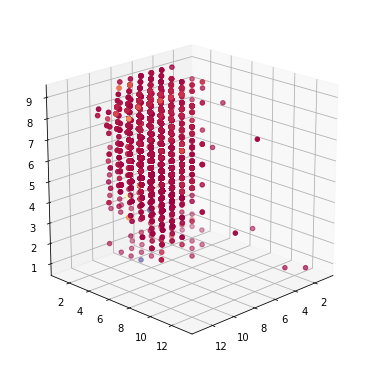

In [20]:
# Let's see what the data looks like

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

## Build model

In [21]:
from sklearn.model_selection import train_test_split

X = housing_data[["TOTROOMS", "BATHROOMS", "UNITSIZE"]]
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(20321, 3) (20321, 1)


In [22]:
print(X_test.shape, y_test.shape)

(6774, 3) (6774, 1)


In [23]:
# Results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)

print('R2: ', score)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

R2:  0.11888768195484589
Weight coefficients:  [[34917.83364972 59700.73556441 30622.99133914]]
y-axis intercept:  [-254396.17191714]


## Predict

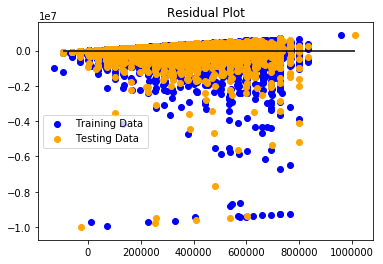

In [24]:
# Build Residual Plot
prediction = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(prediction, prediction - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=prediction.min(), xmax=prediction.max())
plt.title("Residual Plot")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
MSE = mean_squared_error(y_test, prediction)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 210369046681.6424, R2: 0.09540907251150323
